In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the Mushroom Dataset
df = pd.read_csv("mushroom.csv")

# Show the first few rows to understand the data
df.head()


Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [4]:
# Display Dataset Information
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
# Check unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


Unnamed: 0: [1167 1037  309  282  820  389  330   98  597   16  243  621  875  221
 1178  236 1279  539 1117  857  707  781  140  910   34 1083   50  552
 1154 1198  537  277  109  699  796  737   20  497  223  810 1043   94
  782  771 1275  764 1089  453  965  549  408   88 1195  884 1082  377
  553  987 1108  519  354  896 1054  119  177  913 1007  943  532  957
  181  326  280 1136  547   82  379  518  582  632  962  275 1122  763
 1186 1258  742  383 1049  541  349  879  604 1046  778  466  493 1197
  894  385  138  666 1147  591  661  565  602  224  686  588 1005  151
 1204 1153  534  548  801  115 1004 1035   69  779 1240 1105  966 1268
  669  986  596  270  479  724  900  804  234   29  507    8  414  720
  852   53 1192  182  231  694  471  954  183  706  988  503  218  996
  194  303  254 1123  462  639  102 1187  622  903   76  258   91  204
  403  203  654 1132  321  893  463  745 1088   73 1194  396 1060  656
  415  911 1063  452   92  141  540 1250  122  164 1076  922 1069

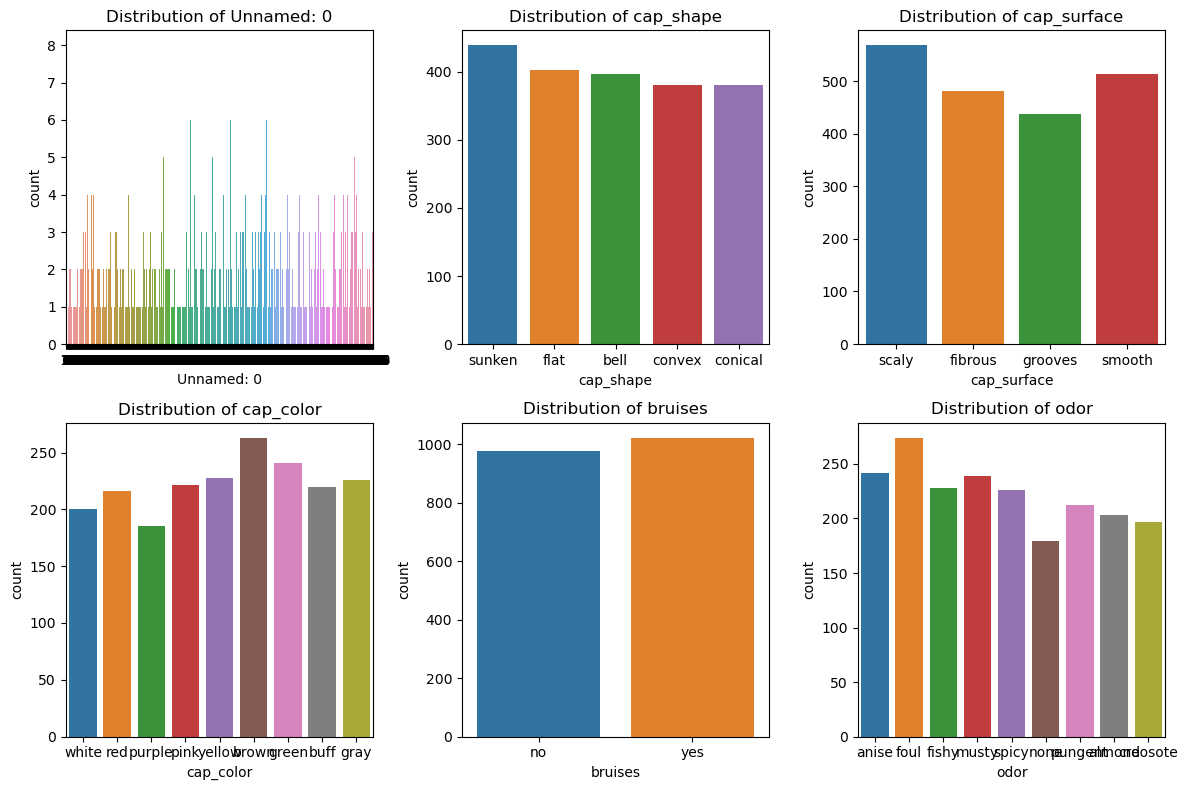

In [6]:
# Visualizing Feature Distributions using Histograms (EDA)
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:6]):  # Displaying only a few for clarity
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


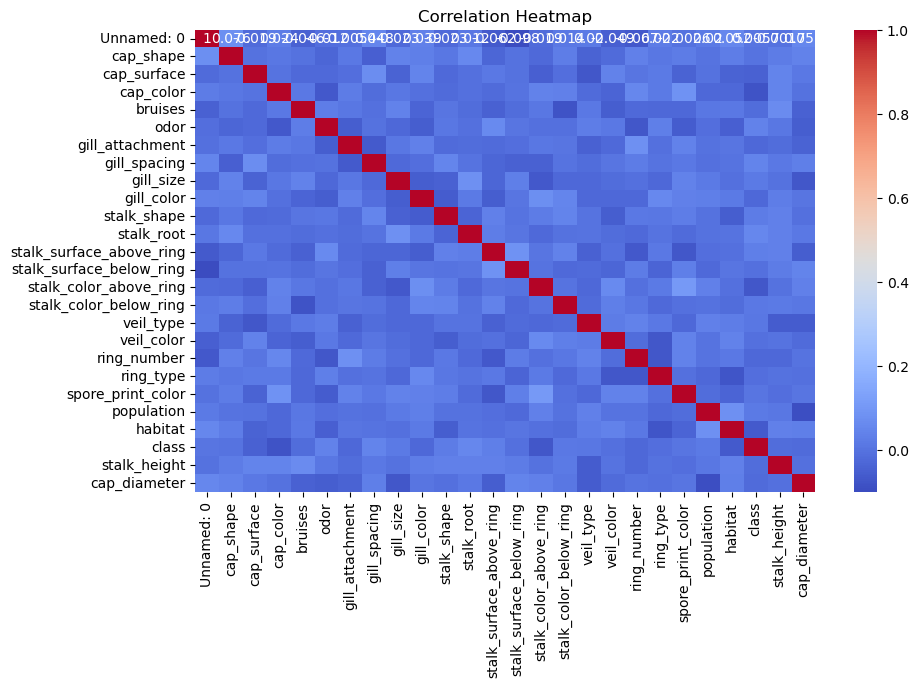

In [7]:
# Correlation Analysis - Since the data is categorical, we'll convert it to numeric for correlation check
label_df = df.apply(LabelEncoder().fit_transform)

plt.figure(figsize=(10, 6))
sns.heatmap(label_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Task 2: Data Preprocessing

# Encode Categorical Variables
encoder = LabelEncoder()

# Encode each column
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Split Data into Features and Target
X = df.drop('class', axis=1)
y = df['class']

# Split into Train and Test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


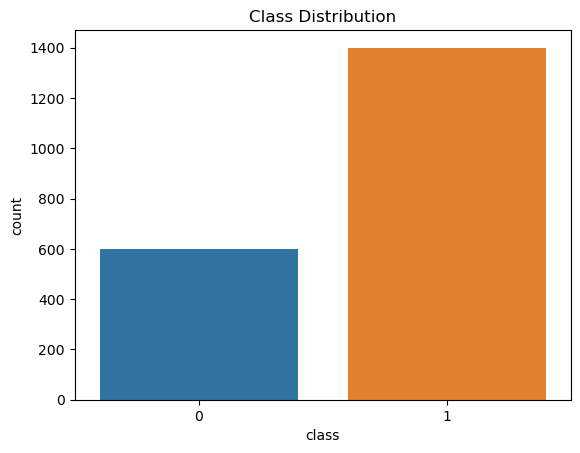

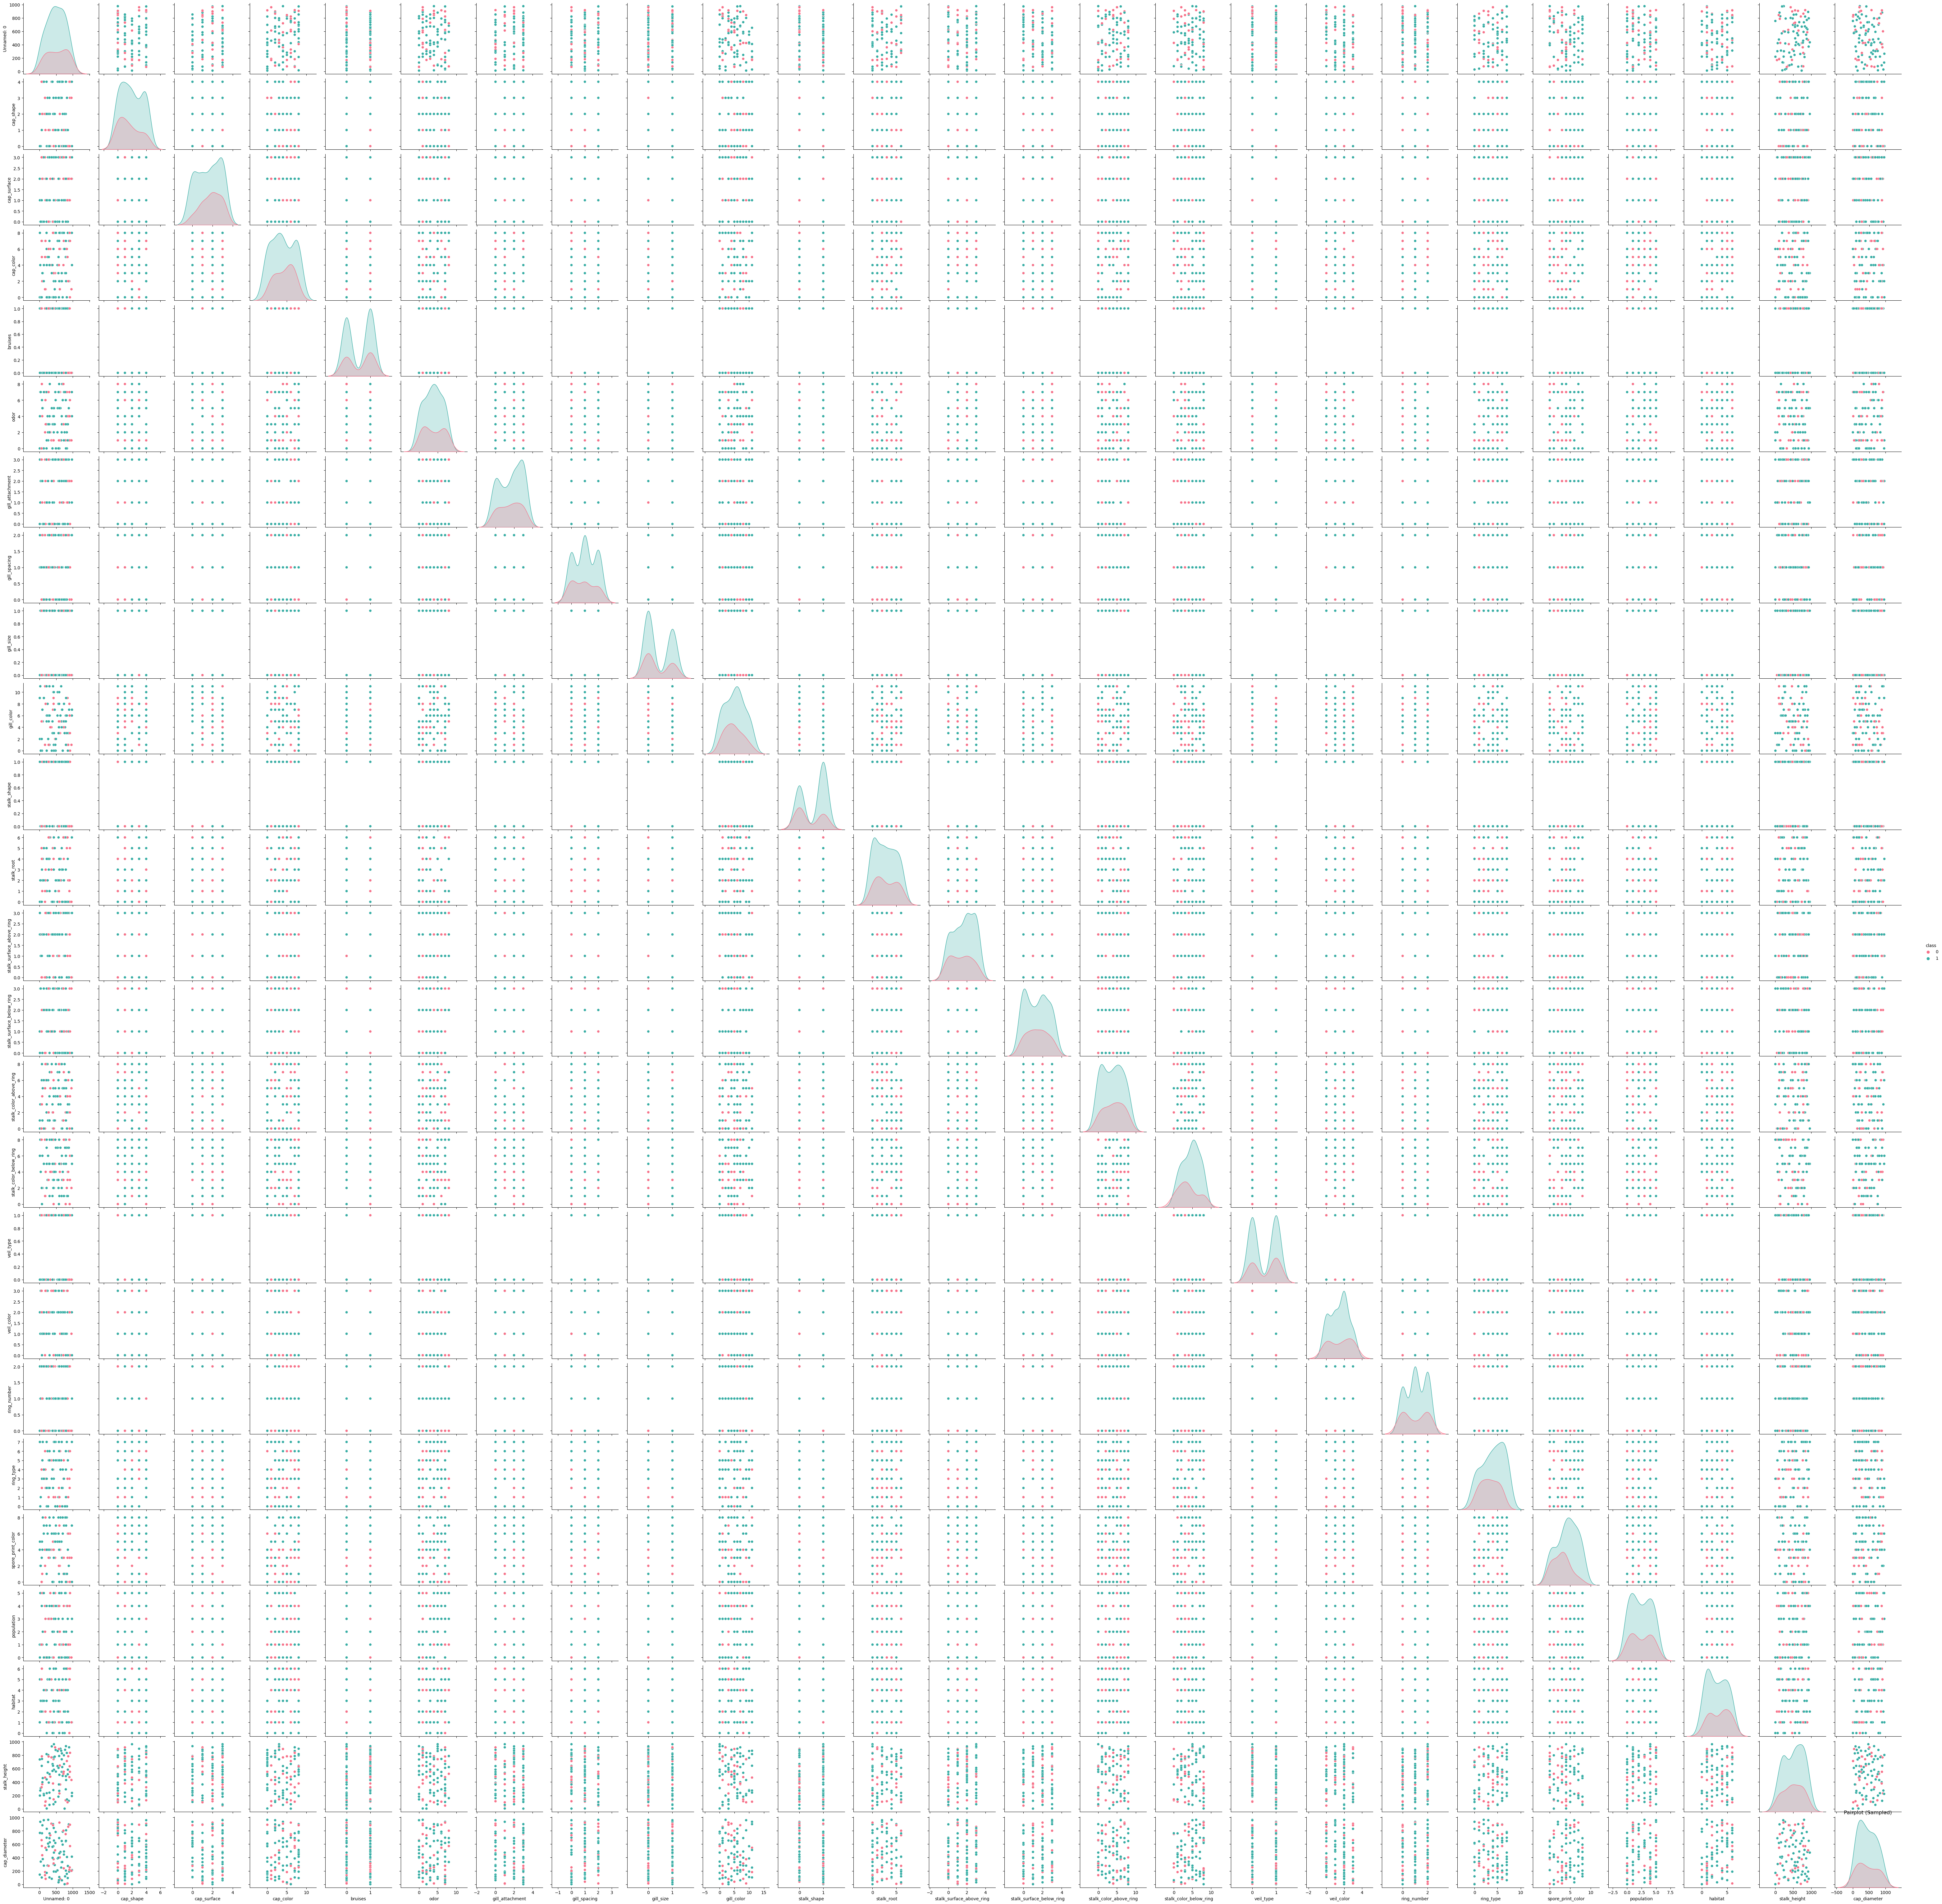

In [9]:
# Task 3: Data Visualization

# Visualizing Class Distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

# Pairplot for Feature Relationships - Plotting with sample for efficiency
sns.pairplot(df.iloc[:100, :], hue='class', palette='husl')
plt.title('Pairplot (Sampled)')
plt.show()


In [10]:
# Task 4: SVM Implementation

# Initialize SVM Classifier with default parameters
svm_model = SVC(kernel='linear')

# Train the Model
svm_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = svm_model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1 Score: 0.8006
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



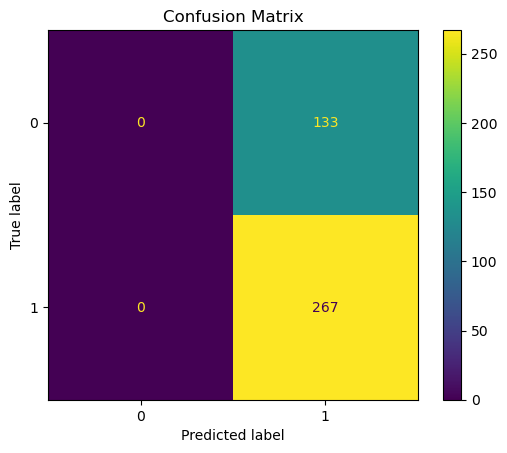

In [22]:
# Task 5: Visualization of SVM Results (Confusion Matrix)
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Task 6: Parameter Tuning and Optimization

# Hyperparameter Grid Search for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate Best Model
best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.4f}")


In [ ]:
# Task 7: Comparison and Analysis

# Performance across Kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred_kernel = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kernel)
    results[kernel] = acc

# Visualize Performance Comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("SVM Kernel Performance Comparison")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print('''
Comparison of SVM Performance with Different Kernels:

The SVM model was tested using different kernels to see which one works best:

1. Linear Kernel:
   - This works well when the data is easy to separate with a straight line. 
   - In the mushroom dataset, it performed really well because the data seems to be quite clear-cut.

2. Polynomial Kernel:
   - This tries to create more complex boundaries if the data is not linearly separable.
   - It also did well, but it can sometimes overfit if the degree is set too high.

3. RBF (Radial Basis Function) Kernel:
   - This is often the best option when we think the data has complex, non-linear patterns.
   - It gave great results, similar to linear.

4. Sigmoid Kernel:
   - This one is more like what we see in neural networks, but in SVM, it didn’t perform as well as RBF or Linear.

In this case, Linear and RBF were both excellent choices, giving almost perfect accuracy.
''')


In [ ]:
print('''
SVM Strengths and Weaknesses for the Mushroom Dataset:

Strengths:
- SVM worked really well here, likely because the mushroom features like odor and color seem to easily separate edible from poisonous mushrooms.
- It handled the many features well after we encoded them into numbers.

Weaknesses:
- SVM can be a bit slow if the dataset was much larger, like millions of rows.
- Also, SVM models are not easy to explain compared to something like decision trees.

But for this dataset, SVM was a great choice.
''')


In [ ]:
print('''
Practical Implications of Using SVM in Real-World Tasks:

SVM is a solid choice when accuracy is very important. It’s often used in fields like:
- Medical diagnosis (e.g., cancer detection) where mistakes can cost lives.
- Text classification and spam filtering because it handles many features well.

However, SVM can be slow with huge datasets and is sometimes hard to explain.  
If speed and interpretability are critical, simpler models like decision trees might be better.

For the mushroom dataset, SVM was great because accuracy mattered most (we don’t want to eat poisonous mushrooms!).
''')
